<a href="https://colab.research.google.com/github/KemiAhmed/Stroke-Predictor/blob/main/STROKE_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [3]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [90]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ModelMetrics’




In [4]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary library for SVM
library(e1071)

In [5]:
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
install.packages("VIM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’




In [27]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [91]:
# Load libraries
library(data.table)
library(tidyverse)
library(tidymodels)
library(skimr)
library(pROC)
library(xgboost)
library(ggplot2)
library(dplyr)
library(rpart)
library(reshape2)
library(randomForest)
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [163]:
# Load data
stroke_data <- read.csv("stroke_dataset.csv")


In [34]:
head(stroke_data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [35]:
glimpse(stroke_data)

Rows: 5,110
Columns: 12
$ id                <int> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 10434…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male"…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <int> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <int> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "S…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban"…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", "…
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", "…
$ stroke            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [36]:
# View summary statistics
summary(stroke_data)

       id           gender               age         hypertension    
 Min.   :   67   Length:5110        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Mode  :character   Median :45.00   Median :0.00000  
 Mean   :36518                      Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                      3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease     ever_married        work_type         Residence_type    
 Min.   :0.00000   Length:5110        Length:5110        Length:5110       
 1st Qu.:0.00000   Class :character   Class :character   Class :character  
 Median :0.00000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.05401                                                           
 3rd Qu.:0.00000                                                           
 Max.   :1.00000                                      

In [37]:
colSums(is.na(stroke_data))

id            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    Residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0                 0                 0                 0

In [38]:
#Drop Column ID
stroke_data = subset(stroke_data, select = -c(id))

In [39]:
head(stroke_data)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


In [159]:
str(stroke_data)


'data.frame':	5109 obs. of  11 variables:
 $ gender           : Factor w/ 2 levels "Female","Male": 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : num  36.6 27.5 32.5 34.4 24 29 27.4 22.8 26.6 24.2 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : num  1 1 1 1 1 1 1 1 1 1 ...


In [40]:
colSums(is.na(stroke_data))

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
                0                 0                 0

In [41]:
unique(stroke_data$bmi)

[1] "36.6" "N/A"  "32.5" "34.4" "24"   "29"   "27.4" "22.8" "24.2" "29.7"
 [11] "36.8" "27.3" "28.2" "30.9" "37.5" "25.8" "37.8" "22.4" "48.9" "26.6"
 [21] "27.2" "23.5" "28.3" "44.2" "25.4" "22.2" "30.5" "26.5" "33.7" "23.1"
 [31] "32"   "29.9" "23.9" "28.5" "26.4" "20.2" "33.6" "38.6" "39.2" "27.7"
 [41] "31.4" "36.5" "33.2" "32.8" "40.4" "25.3" "30.2" "47.5" "20.3" "30"  
 [51] "28.9" "28.1" "31.1" "21.7" "27"   "24.1" "45.9" "44.1" "22.9" "29.1"
 [61] "32.3" "41.1" "25.6" "29.8" "26.3" "26.2" "29.4" "24.4" "28"   "28.8"
 [71] "34.6" "19.4" "30.3" "41.5" "22.6" "56.6" "27.1" "31.3" "31"   "31.7"
 [81] "35.8" "28.4" "20.1" "26.7" "38.7" "34.9" "25"   "23.8" "21.8" "27.5"
 [91] "24.6" "32.9" "26.1" "31.9" "34.1" "36.9" "37.3" "45.7" "34.2" "23.6"
[101] "22.3" "37.1" "45"   "25.5" "30.8" "37.4" "34.5" "27.9" "29.5" "46"  
[111] "42.5" "35.5" "26.9" "45.5" "31.5" "33"   "23.4" "30.7" "20.5" "21.5"
[121] "40"   "28.6" "42.2" "29.6" "35.4" "16.9" "26.8" "39.3" "32.6" "35.9"
[131] "21.2" "42.4" "40.5" "36.7" "29.3" "19.6" "18"   "17.6" "19.1" "50.1"
[141] "17.7" "54.6" "35"   "22"   "39.4" "19.7" "22.5" "25.2" "41.8" "60.9"
[151] "23.7" "24.5" "31.2" "16"   "31.6" "25.1" "24.8" "18.3" "20"   "19.5"
[161] "36"   "35.3" "40.1" "43.1" "21.4" "34.3" "27.6" "16.5" "24.3" "25.7"
[171] "21.9" "38.4" "25.9" "54.7" "18.6" "24.9" "48.2" "20.7" "39.5" "23.3"
[181] "64.8" "35.1" "43.6" "21"   "47.3" "16.6" "21.6" "15.5" "35.6" "16.7"
[191] "41.9" "16.4" "17.1" "29.2" "37.9" "44.6" "39.6" "40.3" "41.6" "39"  
[201] "23.2" "18.9" "36.1" "36.3" "46.5" "16.8" "46.6" "35.2" "20.9" "13.8"
[211] "31.8" "15.3" "38.2" "45.2" "17"   "49.8" "27.8" "60.2" "23"   "22.1"
[221] "26"   "44.3" "51"   "39.7" "34.7" "21.3" "41.2" "34.8" "19.2" "35.7"
[231] "40.8" "24.7" "19"   "32.4" "34"   "28.7" "32.1" "51.5" "20.4" "30.6"
[241] "71.9" "19.3" "40.9" "17.2" "16.1" "16.2" "40.6" "18.4" "21.1" "42.3"
[251] "32.2" "50.2" "17.5" "18.7" "42.1" "47.8" "20.8" "30.1" "17.3" "36.4"
[261] "12"   "36.2" "55.7" "14.4" "43"   "41.7" "33.8" "43.9" "22.7" "57.5"
[271] "37"   "38.5" "16.3" "44"   "32.7" "54.2" "40.2" "33.3" "17.4" "41.3"
[281] "52.3" "14.6" "17.8" "46.1" "33.1" "18.1" "43.8" "50.3" "38.9" "43.7"
[291] "39.9" "15.9" "19.8" "12.3" "78"   "38.3" "41"   "42.6" "43.4" "15.1"
[301] "20.6" "33.5" "43.2" "30.4" "38"   "33.4" "44.9" "44.7" "37.6" "39.8"
[311] "53.4" "55.2" "42"   "37.2" "42.8" "18.8" "42.9" "14.3" "37.7" "48.4"
[321] "50.6" "46.2" "49.5" "43.3" "33.9" "18.5" "44.5" "45.4" "55"   "54.8"
[331] "19.9" "17.9" "15.6" "52.8" "15.2" "66.8" "55.1" "18.2" "48.5" "55.9"
[341] "57.3" "10.3" "14.1" "15.7" "56"   "44.8" "13.4" "51.8" "38.1" "57.7"
[351] "44.4" "38.8" "49.3" "39.1" "54"   "56.1" "97.6" "53.9" "13.7" "11.5"
[361] "41.4" "14.2" "49.4" "15.4" "45.1" "49.2" "48.7" "53.8" "42.7" "48.8"
[371] "52.7" "53.5" "50.5" "15.8" "45.3" "14.8" "51.9" "63.3" "40.7" "61.2"
[381] "48"   "46.8" "48.3" "58.1" "50.4" "11.3" "12.8" "13.5" "14.5" "15"  
[391] "59.7" "47.4" "52.5" "13.2" "52.9" "61.6" "49.9" "54.3" "47.9" "13"  
[401] "13.9" "50.9" "57.2" "64.4" "92"   "50.8" "57.9" "45.8" "47.6" "14"  
[411] "46.4" "46.9" "47.1" "13.3" "48.1" "51.7" "46.3" "54.1" "14.9"

In [45]:
install.packages("naniar")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘UpSetR’




In [46]:
library(naniar)



Attaching package: ‘naniar’


The following object is masked from ‘package:skimr’:

    n_complete




In [48]:
miss_scan_count(stroke_data, search = list( "N/A"))


Variable,n
<chr>,<int>
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [49]:
# Replace "N/A" and other placeholders with NA
stroke_data$bmi[stroke_data$bmi == "N/A"] <- NA

In [50]:
sum(is.na(stroke_data$bmi))

[1] 201

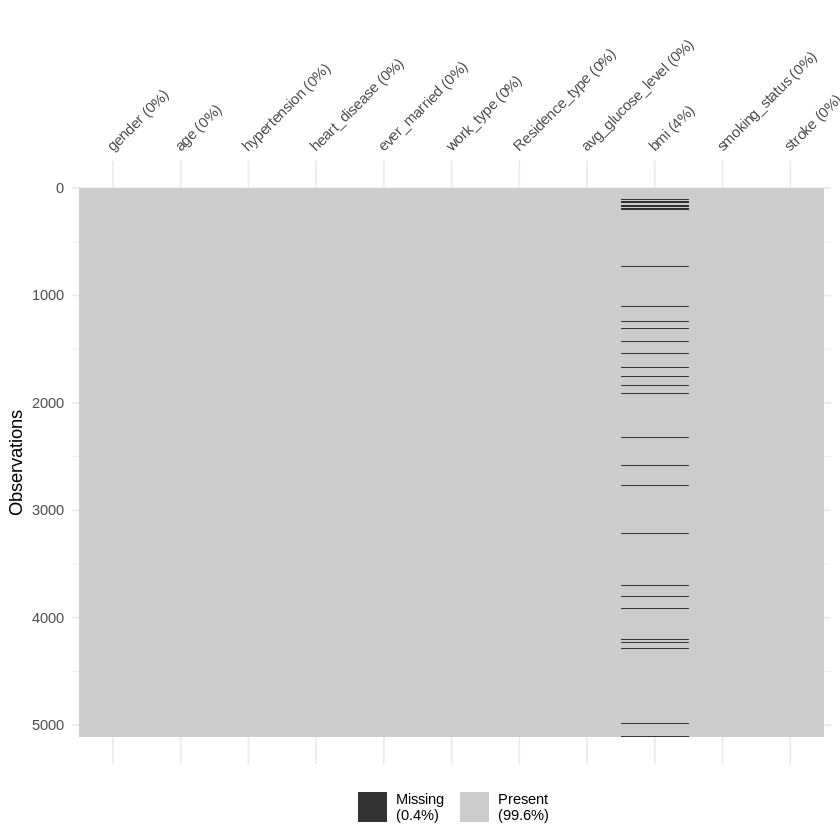

In [51]:
vis_miss(stroke_data)

In [52]:
library(VIM)

Loading required package: colorspace


Attaching package: ‘colorspace’


The following object is masked from ‘package:pROC’:

    coords


Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:recipes’:

    prepare


The following object is masked from ‘package:datasets’:

    sleep




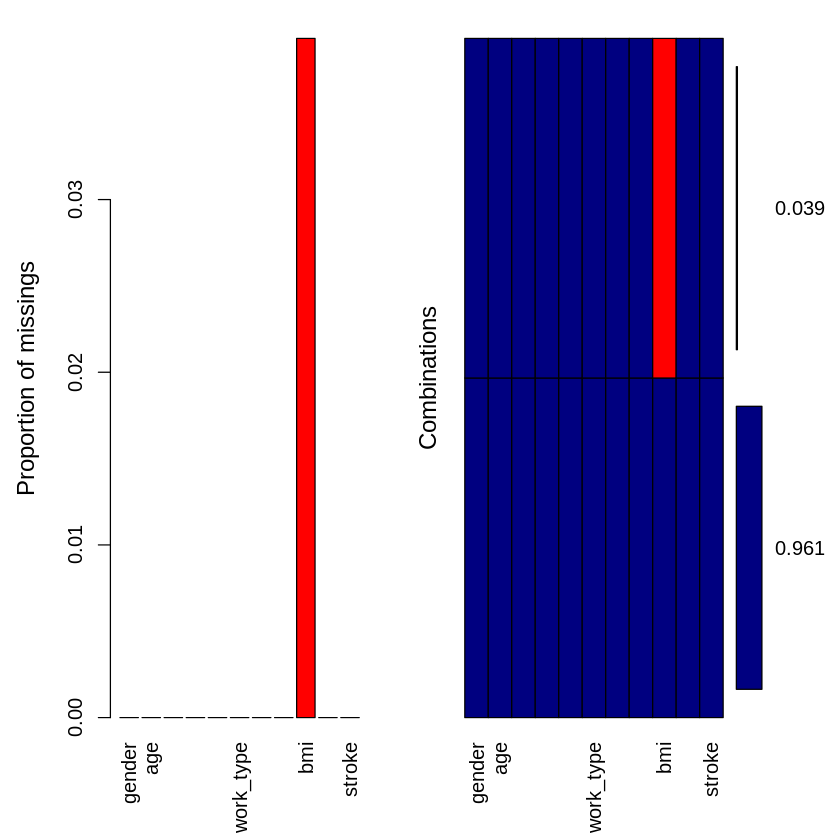

In [53]:
# Visualize missing values
aggr(stroke_data, col = c("navyblue", "red"), numbers = TRUE)

In [54]:
# Convert 'bmi' from character to numeric (may introduce NAs for invalid entries)
stroke_data$bmi <- as.numeric(stroke_data$bmi)

# Check if conversion has worked correctly
summary(stroke_data$bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.30   23.50   28.10   28.89   33.10   97.60     201 

In [55]:
# Impute missing BMI using kNN
stroke_data <- kNN(stroke_data, variable = "bmi", k = 5, imp_var = FALSE)

In [56]:
sum(is.na(stroke_data$bmi))

[1] 0

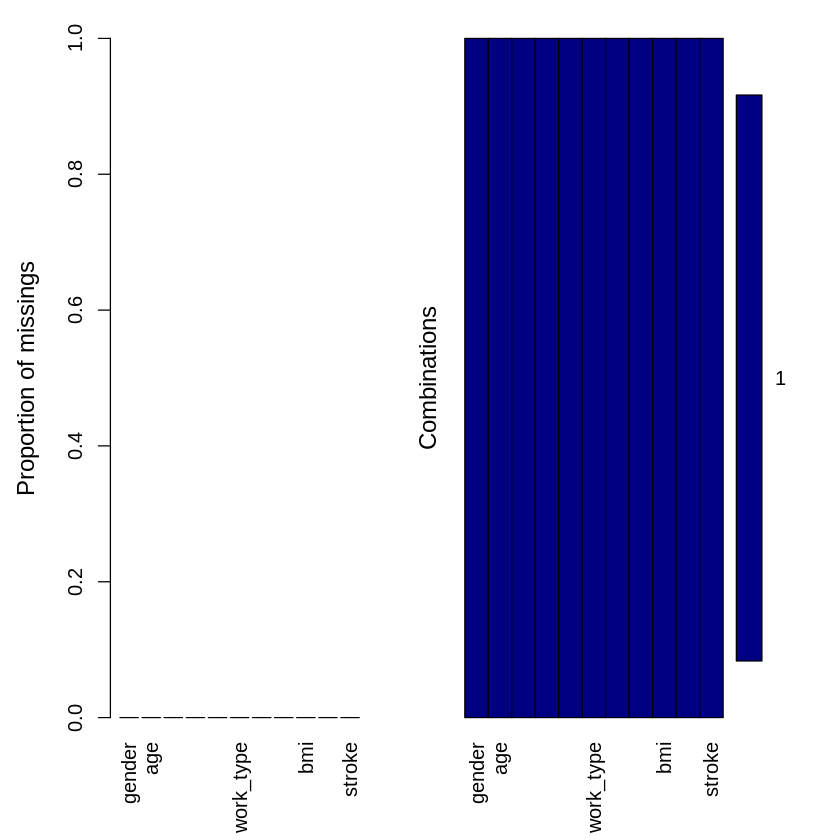

In [160]:
# Visualize missing values
aggr(stroke_data, col = c("navyblue", "red"), numbers = TRUE)

In [57]:
colSums(is.na(stroke_data))

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
                0                 0                 0

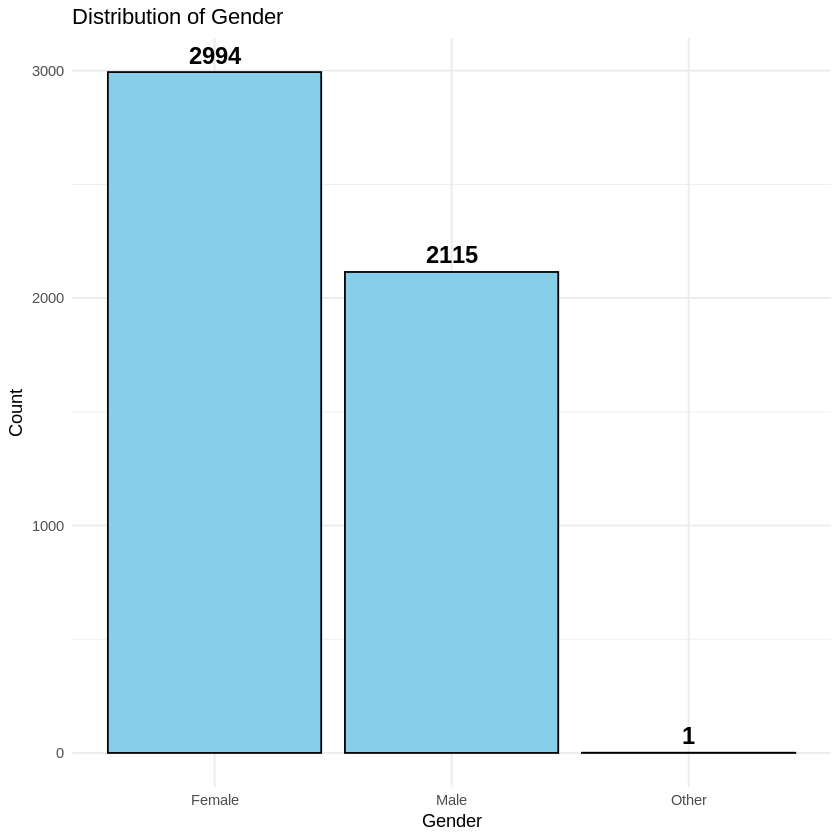

In [164]:
# Create a bar plot with count labels
ggplot(stroke_data, aes(x = gender)) +
  geom_bar(fill = "skyblue", color = "black") +  # Bar chart
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5, size = 5, fontface = "bold") +  # Add counts
  labs(title = "Distribution of Gender", x = "Gender", y = "Count") +
  theme_minimal()

In [60]:
# Filter out rows where gender is not 'Male' or 'Female'
stroke_data <- stroke_data[stroke_data$gender %in% c("Male", "Female"), ]

# Check the remaining values in the gender column
table(stroke_data$gender)




Female   Male 
  2994   2115 

In [61]:
unique(stroke_data)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.5,never smoked,1
3,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
7,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
8,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,59,0,0,Yes,Private,Rural,76.15,26.6,Unknown,1


In [62]:
# Remove any unwanted logical columns created during imputation
stroke_data <- stroke_data[, !grepl("imp", names(stroke_data))]

# Check the structure again
str(stroke_data)


'data.frame':	5109 obs. of  11 variables:
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : num  36.6 27.5 32.5 34.4 24 29 27.4 22.8 26.6 24.2 ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [64]:
if(!require('gridExtra')) {
  install.packages('gridExtra')
  library('gridExtra')
}

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


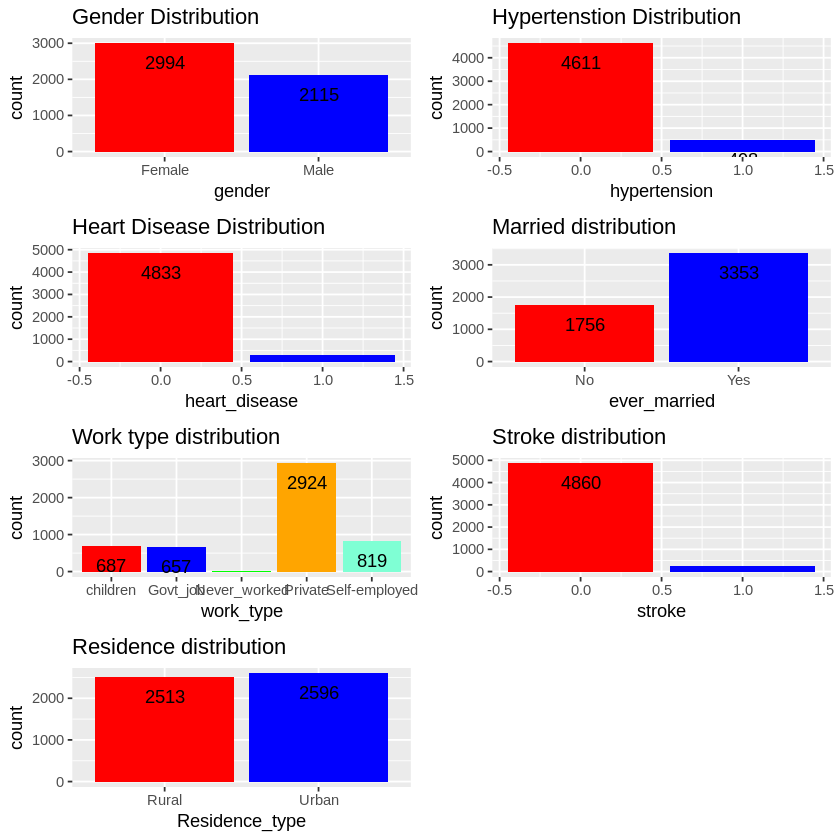

In [65]:
d1 <- stroke_data %>%
  ggplot(aes(x = gender, fill = gender)) +
  geom_bar(fill = c("red", "blue")) +
  ggtitle("Gender Distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)

d2 <- stroke_data %>%
  ggplot(aes(x = hypertension, fill = hypertension)) +
  geom_bar(fill = c("red", "blue")) +
  ggtitle("Hypertenstion Distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)


d3 <- stroke_data %>%
  ggplot(aes(x = heart_disease, fill = heart_disease)) +
  geom_bar(fill = c("red", "blue")) +
  ggtitle("Heart Disease Distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)

d4 <- stroke_data %>%
  ggplot(aes(x = ever_married, fill = ever_married)) +
  geom_bar(fill = c("red","blue")) +
  ggtitle("Married distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)

d5 <- stroke_data %>%
  ggplot(aes(x = work_type, fill = work_type)) +
  geom_bar(fill = c("red", "blue","green","orange","aquamarine")) +
  ggtitle("Work type distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)

d6 <- stroke_data %>%
  ggplot(aes(x = stroke, fill = stroke)) +
  geom_bar(fill = c("red", "blue")) +
  ggtitle("Stroke distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)

d7 <- stroke_data %>%
  ggplot(aes(x = Residence_type, fill = Residence_type)) +
  geom_bar(fill = c("red", "blue")) +
  ggtitle("Residence distribution") +
  geom_text(aes(label=..count..), stat = "Count", vjust = 2.0)


grid.arrange(d1,d2,d3,d4,d5,d6,d7, ncol=2)

In [66]:
print(colnames(stroke_data))

 [1] "gender"            "age"               "hypertension"     
 [4] "heart_disease"     "ever_married"      "work_type"        
 [7] "Residence_type"    "avg_glucose_level" "bmi"              
[10] "smoking_status"    "stroke"           



   0    1 
4860  249 

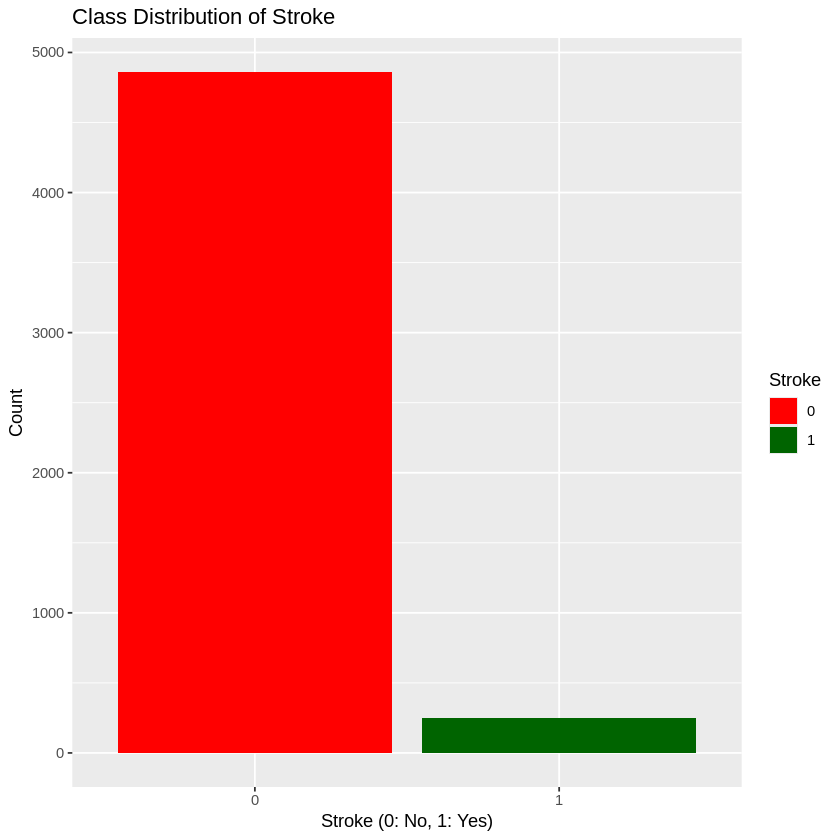

In [67]:
# Distribution of target variable
table(stroke_data$stroke)

# Visualize class imbalance
ggplot(stroke_data, aes(x = factor(stroke), fill = factor(stroke))) +
  geom_bar() +
  labs(title = "Class Distribution of Stroke", x = "Stroke (0: No, 1: Yes)", y = "Count") +
  scale_fill_manual(values = c("red", "darkgreen"), name = "Stroke")


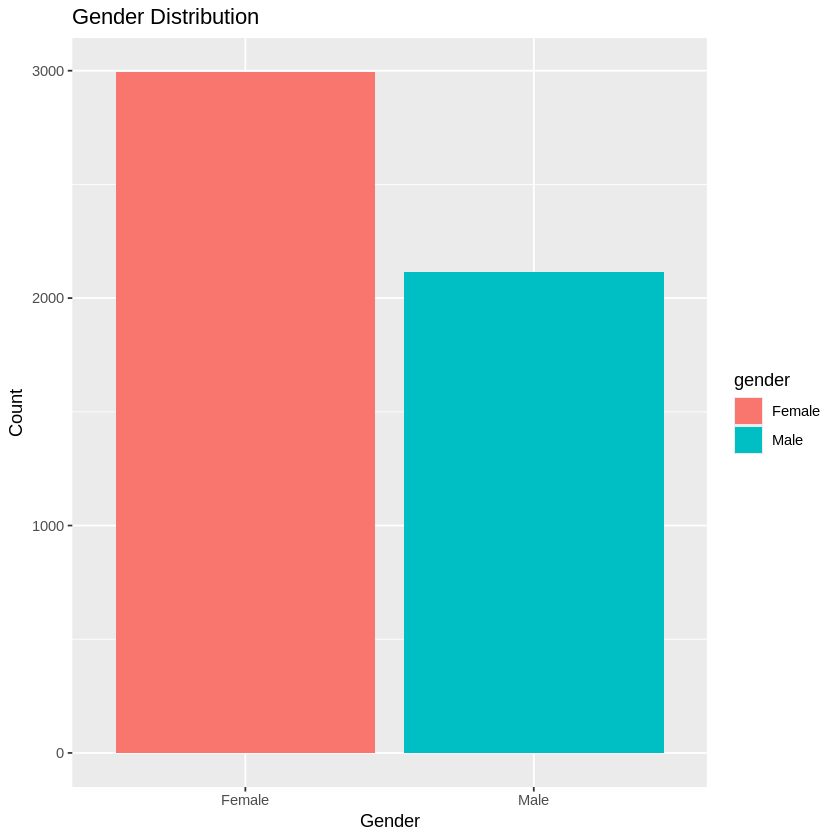

In [68]:
# Gender Distribution
ggplot(stroke_data, aes(x = gender, fill = gender)) +
  geom_bar() +
  labs(title = "Gender Distribution", x = "Gender", y = "Count")


**UNIVARIATE ANALYSIS OF CATEGORICAL/NUMERICAL ANALYSIS**

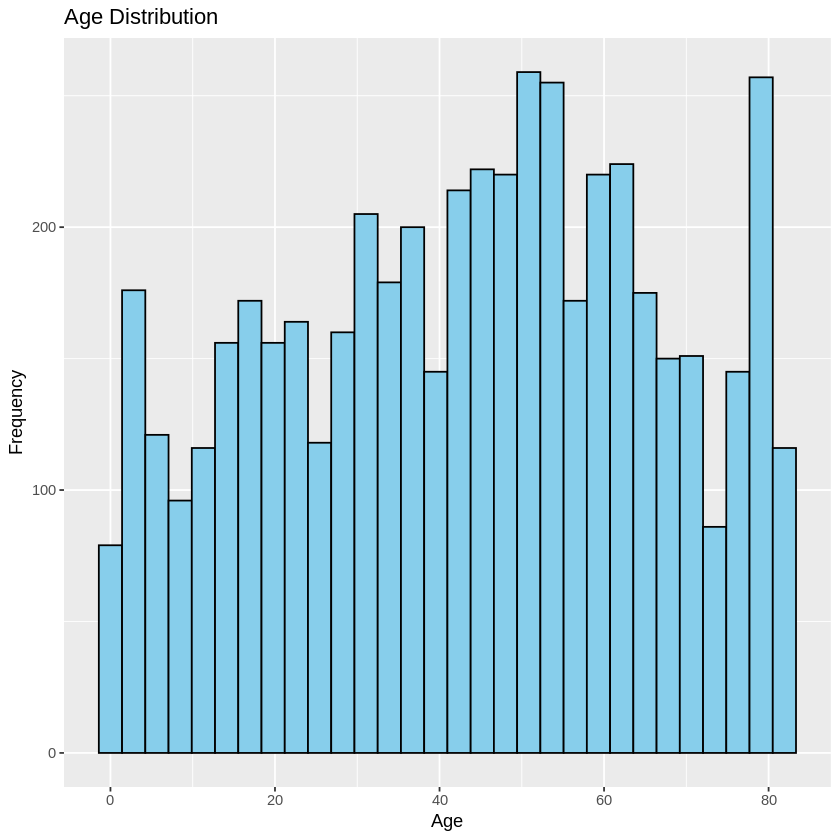

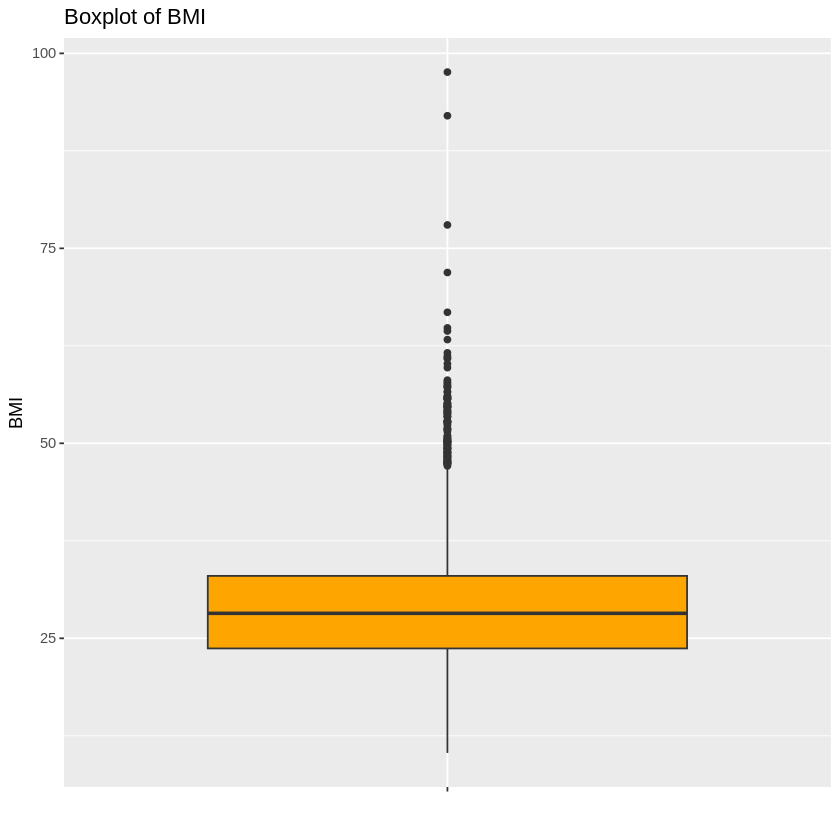

In [69]:
# Age Distribution
ggplot(stroke_data, aes(x = age)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Age Distribution", x = "Age", y = "Frequency")

# Boxplot for BMI
ggplot(stroke_data, aes(x = "", y = bmi)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Boxplot of BMI", x = "", y = "BMI")


**BIVARIATE ANALYSIS OF NUMERICAL FEATURES**




corrplot 0.95 loaded



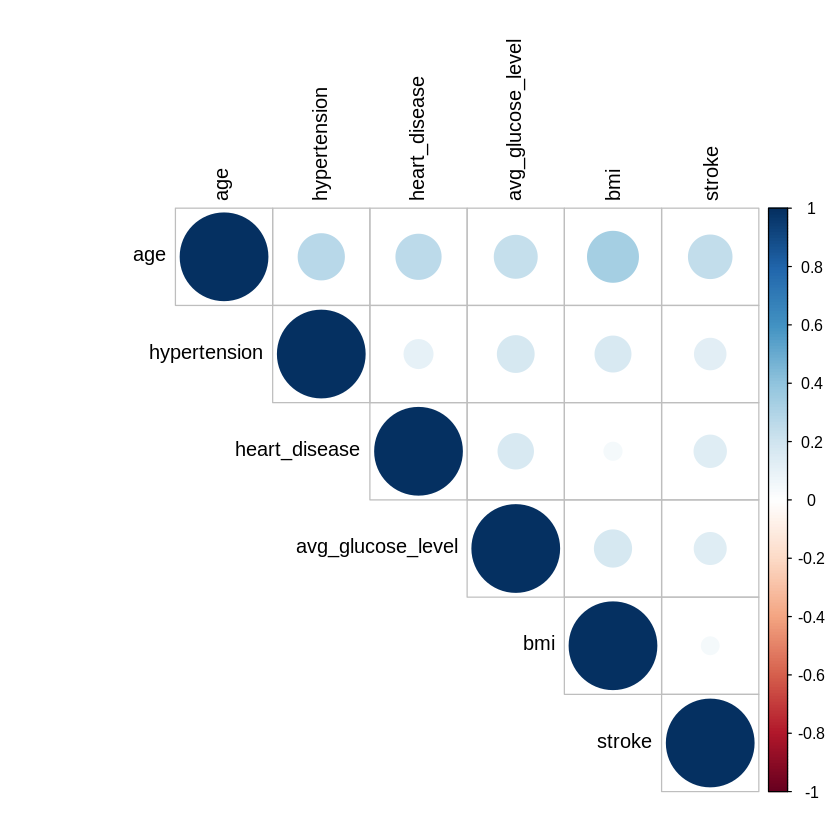

In [70]:
# Correlation matrix
numeric_cols <- select(stroke_data, where(is.numeric))
cor_matrix <- cor(numeric_cols, use = "complete.obs")

# Visualize the correlation matrix
library(corrplot)

corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "black")


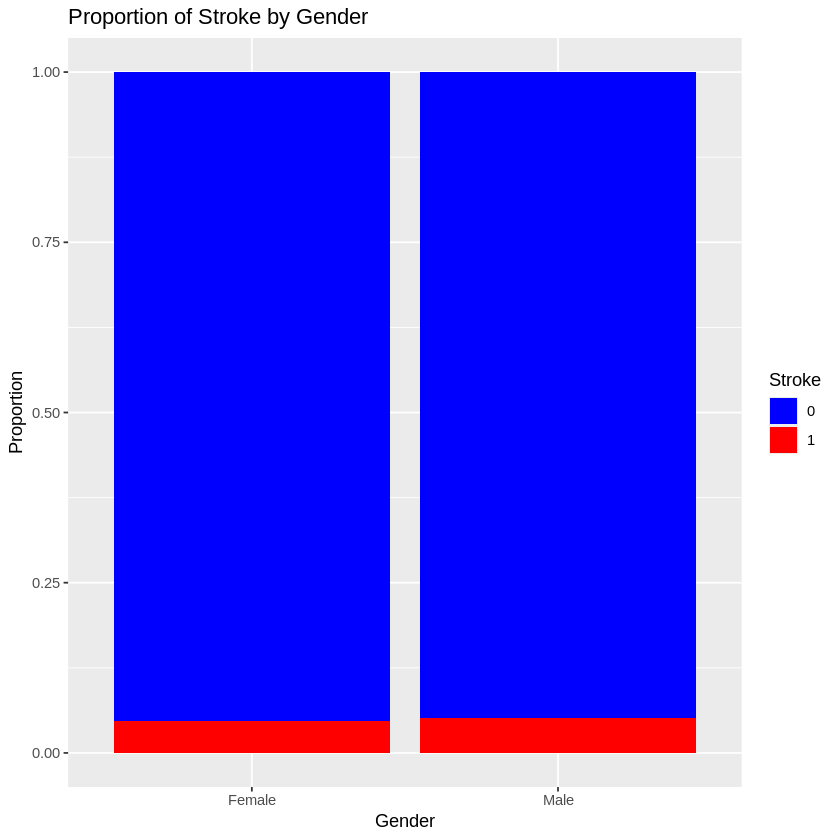

In [71]:
# Stroke distribution by gender
ggplot(stroke_data, aes(x = gender, fill = factor(stroke))) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Stroke by Gender", x = "Gender", y = "Proportion") +
  scale_fill_manual(values = c("blue", "red"), name = "Stroke")


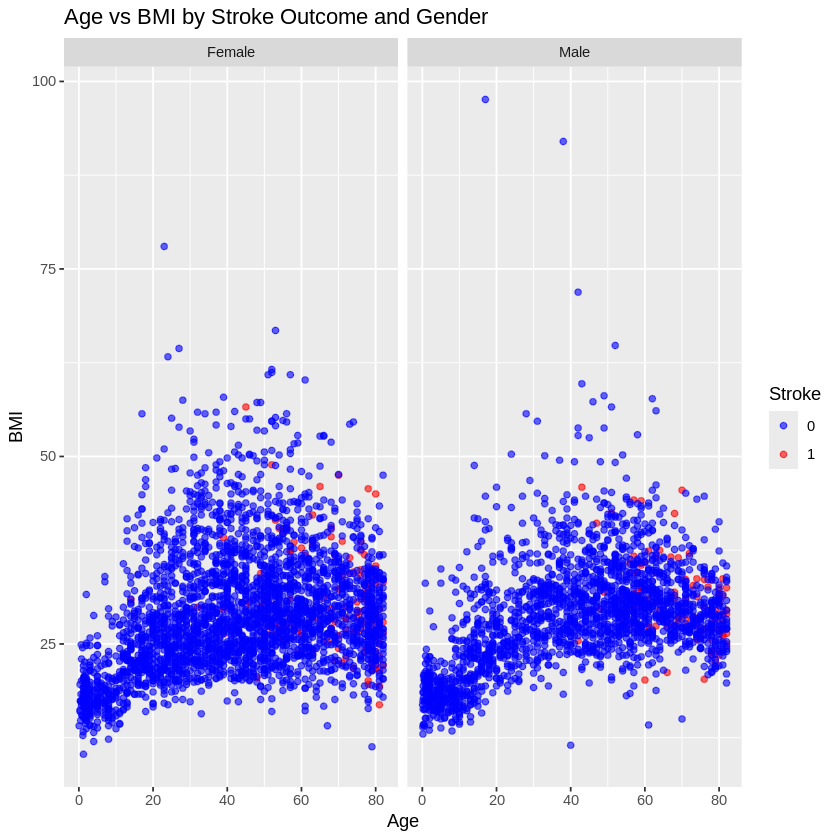

In [72]:
ggplot(stroke_data, aes(x = age, y = bmi, color = factor(stroke))) +
  geom_point(alpha = 0.6) +
  facet_wrap(~gender) +
  labs(title = "Age vs BMI by Stroke Outcome and Gender", x = "Age", y = "BMI") +
  scale_color_manual(values = c("blue", "red"), name = "Stroke")


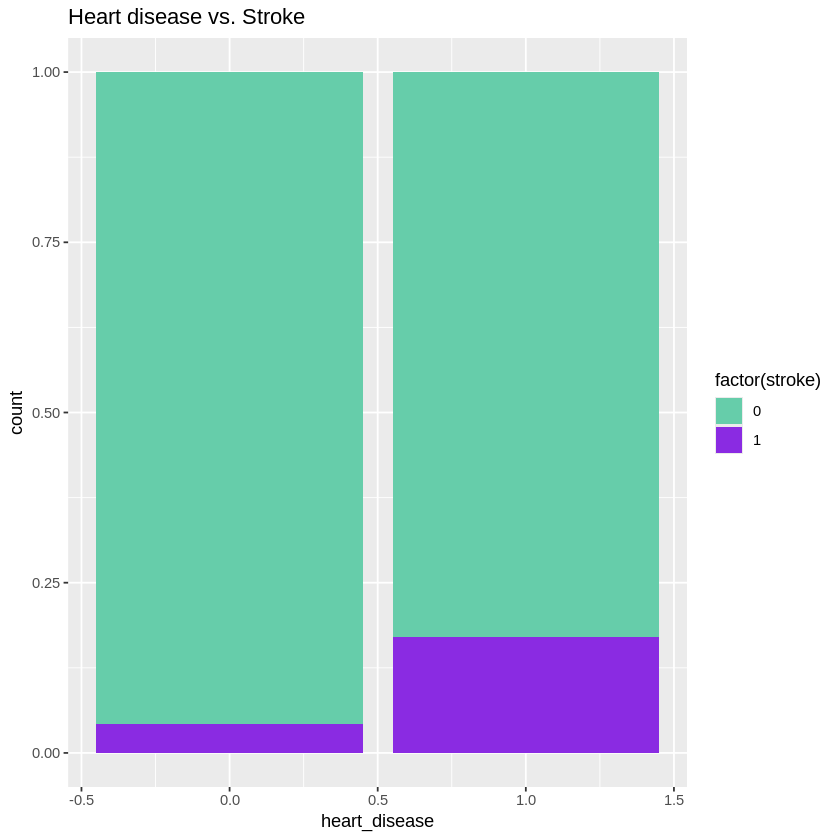

In [75]:
stroke_data %>%
  ggplot(aes(x = heart_disease, fill = factor(stroke) )) +
  geom_bar(position = "fill") +
  scale_fill_manual(values=c("aquamarine3",
                             "blueviolet")) +
  ggtitle("Heart disease vs. Stroke")

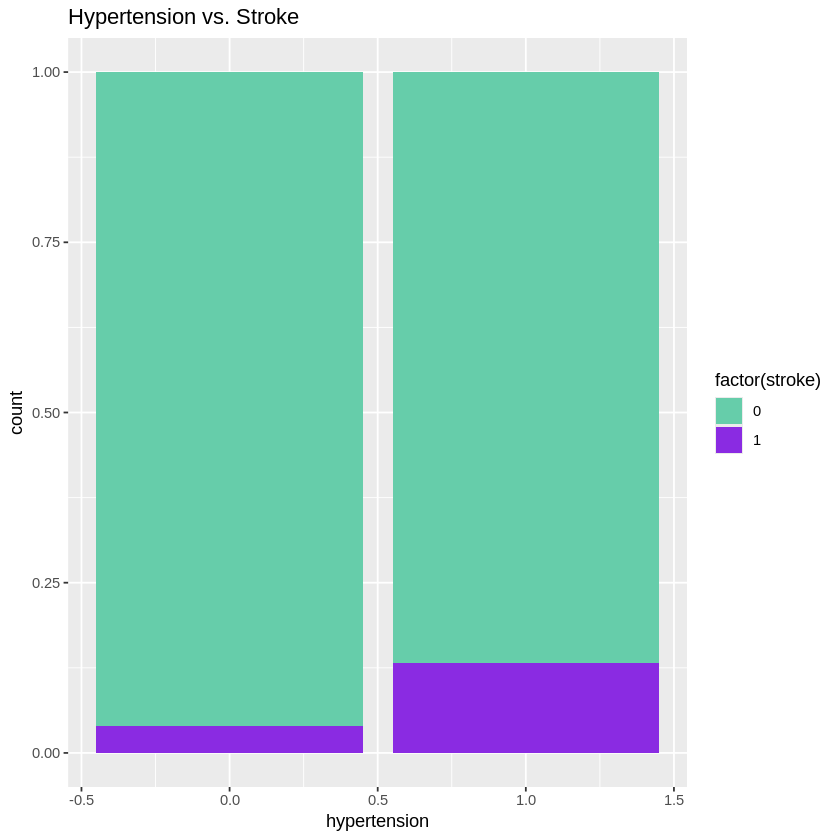

In [76]:
stroke_data %>%
  ggplot(aes(x = hypertension, fill = factor(stroke))) +
  geom_bar(position = "fill") +
  scale_fill_manual(values=c("aquamarine3",
                             "blueviolet")) +
  ggtitle("Hypertension vs. Stroke")

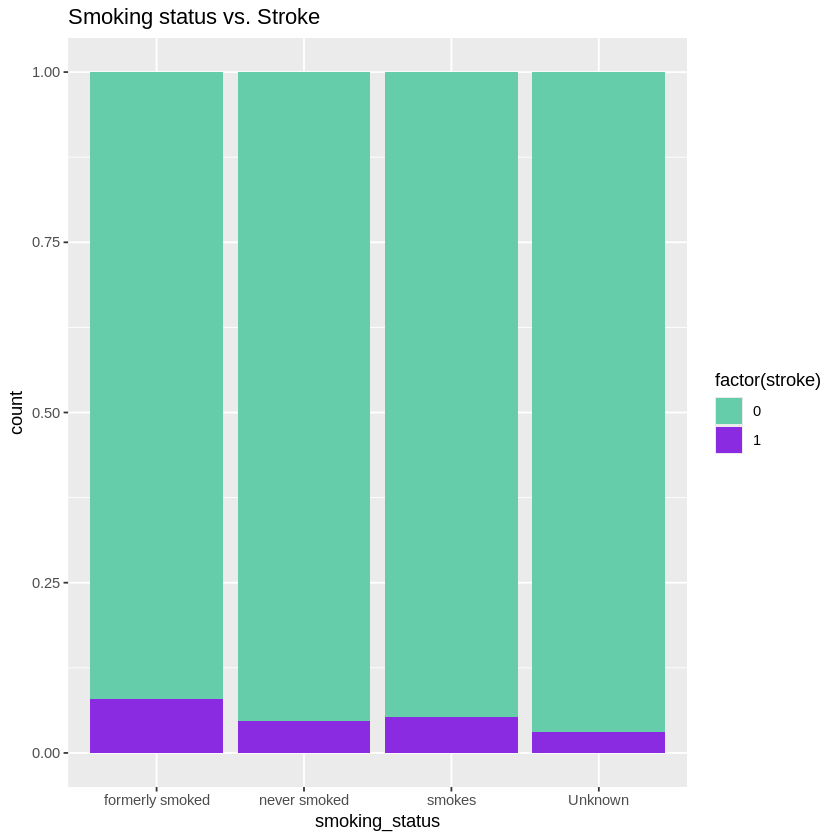

In [77]:
stroke_data %>%
  ggplot(aes(x = smoking_status, fill = factor(stroke))) +
  geom_bar(position = "fill") +
  scale_fill_manual(values=c("aquamarine3",
                             "blueviolet")) +
  ggtitle("Smoking status vs. Stroke")

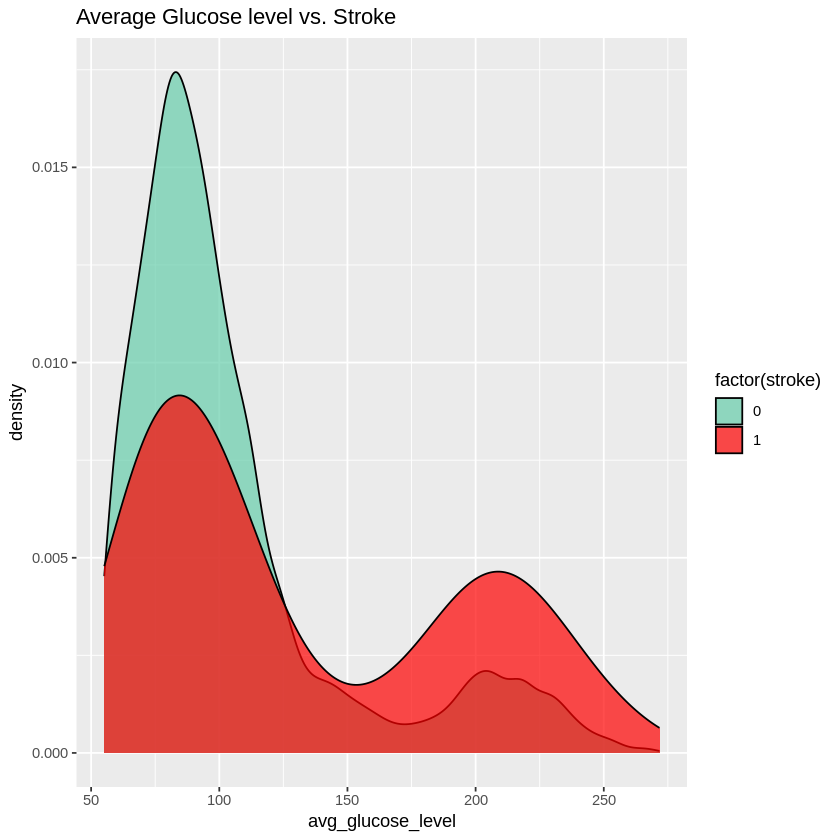

In [78]:
stroke_data %>%
  ggplot(aes(x = avg_glucose_level, fill = factor(stroke))) +
  geom_density(alpha = 0.7) +
  scale_fill_manual(values=c("aquamarine3",
                             "red"
  )) +
  ggtitle("Average Glucose level vs. Stroke")

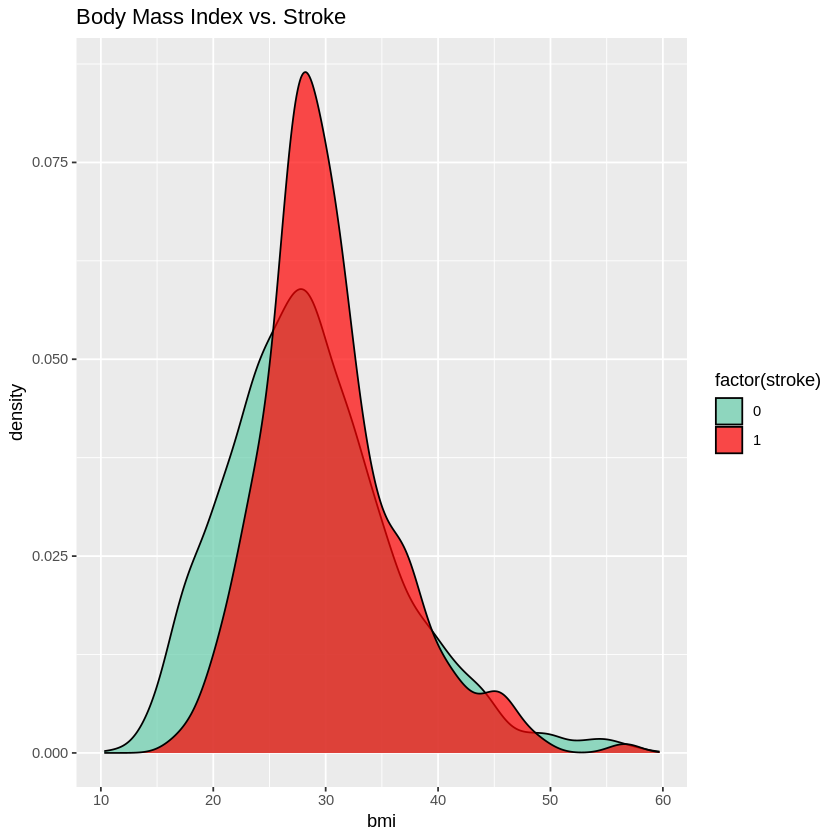

In [79]:
stroke_data %>% filter(between(bmi, 0, 60)) %>%
  ggplot(aes(x = bmi, fill = factor(stroke))) +
  geom_density(alpha = 0.7) +
  scale_fill_manual(values=c("aquamarine3",
                             "red"
  )) +
  ggtitle("Body Mass Index vs. Stroke")

In [80]:
# Convert gender to factor
stroke_data$gender <- factor(stroke_data$gender)

# Convert other categorical columns to factors
stroke_data$ever_married <- factor(stroke_data$ever_married)
stroke_data$work_type <- factor(stroke_data$work_type)
stroke_data$Residence_type <- factor(stroke_data$Residence_type)
stroke_data$smoking_status <- factor(stroke_data$smoking_status)

# Convert stroke to a factor (target variable)
stroke_data$stroke <- factor(stroke_data$stroke, levels = c(0, 1))


In [81]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.5,never smoked,1
3,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
7,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
8,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,59,0,0,Yes,Private,Rural,76.15,26.6,Unknown,1


In [82]:
# Check the current dataset size
nrow(stroke_data)

# Get the class distribution (to see how imbalanced the classes are)
table(stroke_data$stroke)


[1] 5109


   0    1 
4860  249 

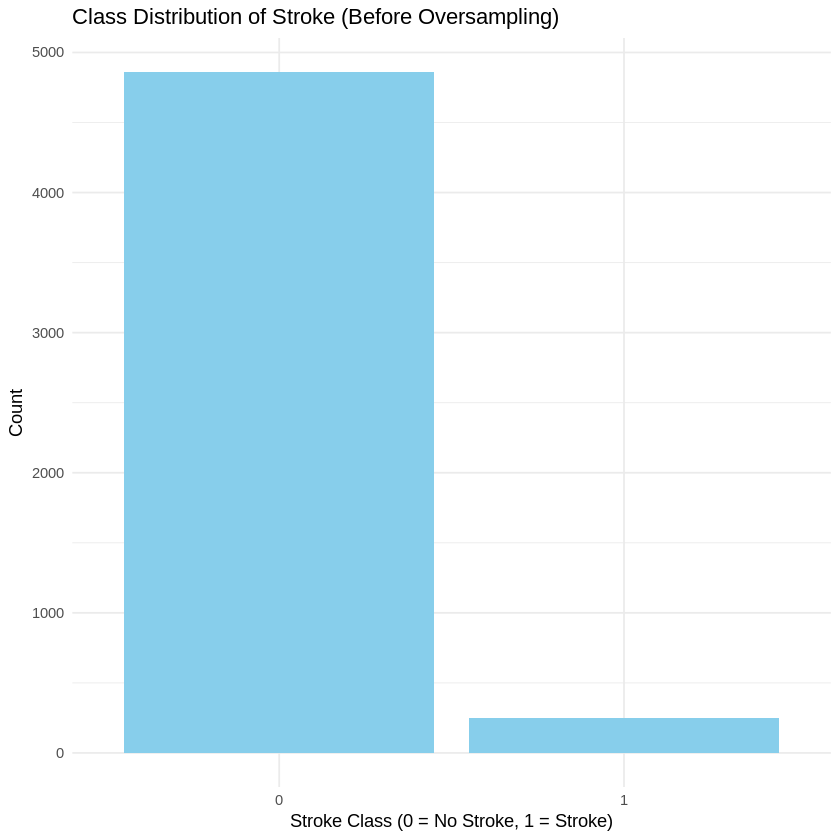

In [83]:
# Load the necessary library
library(ggplot2)

# Plot the class distribution after oversampling
ggplot(stroke_data, aes(x = factor(stroke))) +
  geom_bar(aes(y = ..count..), fill = "skyblue") +
  labs(title = "Class Distribution of Stroke (Before Oversampling)",
       x = "Stroke Class (0 = No Stroke, 1 = Stroke)",
       y = "Count") +
  theme_minimal()


In [84]:
# Apply ROSE (Random Over-Sampling Examples)
install.packages("ROSE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [85]:
library(ROSE)

Loaded ROSE 0.0-4




In [86]:


# Create balanced dataset using ROSE (oversampling)
balanced_data <- ovun.sample(stroke ~ ., data = stroke_data, method = "over", N = 2 * table(stroke_data$stroke)[1])$data

# View the class distribution in the balanced dataset
table(balanced_data$stroke)



   0    1 
4860 4860 


   0    1 
4860 4860 


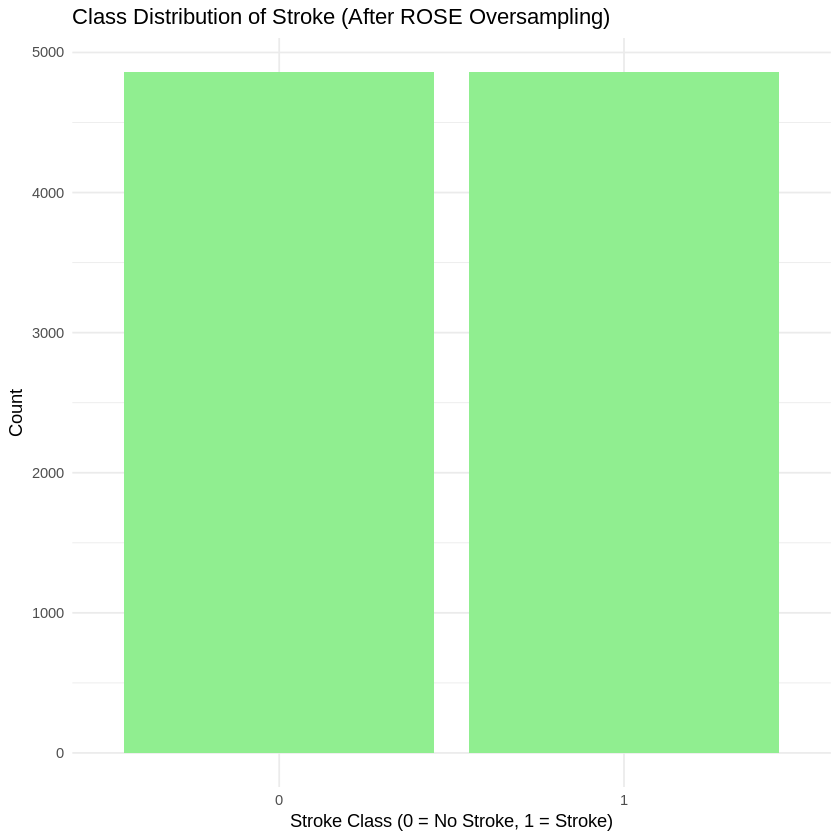

In [88]:
# Load necessary libraries
library(ggplot2)

# Create a balanced dataset using ROSE (oversampling)
balanced_data <- ovun.sample(stroke ~ ., data = stroke_data, method = "over", N = 2 * table(stroke_data$stroke)[1])$data

# View the class distribution in the balanced dataset
class_distribution <- table(balanced_data$stroke)

# Plot the class distribution
ggplot(balanced_data, aes(x = factor(stroke))) +
  geom_bar(aes(y = ..count..), fill = "lightgreen") +
  labs(title = "Class Distribution of Stroke (After ROSE Oversampling)",
       x = "Stroke Class (0 = No Stroke, 1 = Stroke)",
       y = "Count") +
  theme_minimal()

# Print the class distribution
print(class_distribution)


In [92]:
# Set a random seed for reproducibility
set.seed(123)

# Create a training set (70%) and a test set (30%)
train_index <- createDataPartition(balanced_data$stroke, p = 0.7, list = FALSE)

# Create training and test datasets
train_data <- balanced_data[train_index, ]
test_data <- balanced_data[-train_index, ]

# View dimensions of the datasets
dim(train_data)
dim(test_data)



[1] 6804   11

[1] 2916   11

**MODEL BUILDING**

1.LOGISTIC REGRESSION

In [93]:
# Build the logistic regression model
log_model <- glm(stroke ~ ., data = train_data, family = "binomial")

# Summarize the model
summary(log_model)
# Make predictions on the test set
log_predictions <- predict(log_model, newdata = test_data, type = "response")

# Convert probabilities to binary classes (threshold = 0.5)
log_pred_class <- ifelse(log_predictions > 0.5, 1, 0)

# Get predicted probabilities for the test dataset
log_pred_prob <- predict(log_model, newdata = test_data, type = "response")



Call:
glm(formula = stroke ~ ., family = "binomial", data = train_data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -3.492e+00  2.285e-01 -15.282  < 2e-16 ***
genderMale                 -2.765e-02  6.378e-02  -0.433  0.66468    
age                         8.089e-02  2.472e-03  32.729  < 2e-16 ***
hypertension                4.856e-01  8.390e-02   5.787 7.15e-09 ***
heart_disease               3.238e-01  1.033e-01   3.134  0.00173 ** 
ever_marriedYes            -1.185e-01  1.008e-01  -1.175  0.23984    
work_typeGovt_job          -1.764e+00  2.470e-01  -7.144 9.09e-13 ***
work_typeNever_worked      -1.269e+01  2.195e+02  -0.058  0.95389    
work_typePrivate           -1.605e+00  2.378e-01  -6.751 1.47e-11 ***
work_typeSelf-employed     -1.819e+00  2.537e-01  -7.169 7.58e-13 ***
Residence_typeUrban         4.518e-02  6.187e-02   0.730  0.46522    
avg_glucose_level           2.805e-03  6.043e-04   4.642 3.45e-06 ***
bm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1069  243
         1  389 1215
                                          
               Accuracy : 0.7833          
                 95% CI : (0.7679, 0.7981)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5665          
                                          
 Mcnemar's Test P-Value : 8.032e-09       
                                          
            Sensitivity : 0.7332          
            Specificity : 0.8333          
         Pos Pred Value : 0.8148          
         Neg Pred Value : 0.7575          
             Prevalence : 0.5000          
         Detection Rate : 0.3666          
   Detection Prevalence : 0.4499          
      Balanced Accuracy : 0.7833          
                                          
       'Positive' Class : 0               
                        

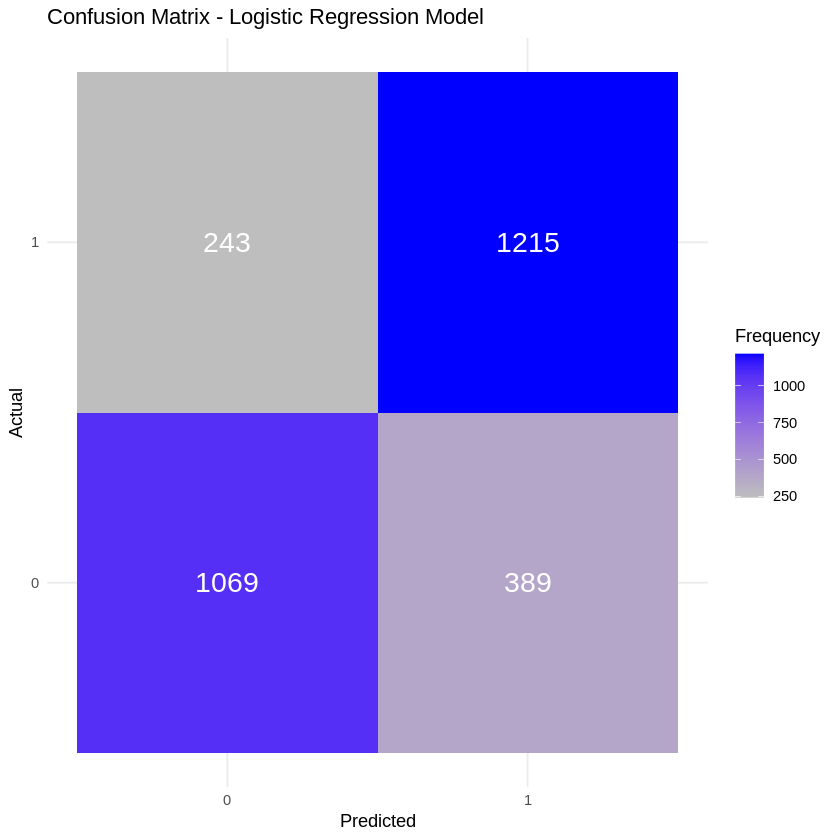

In [96]:

# Evaluate Logistic Regression model
confusion_matrix_log <- confusionMatrix(as.factor(log_pred_class), as.factor(test_data$stroke))
print(confusion_matrix_log)

# Convert confusion matrix to a data frame
cm_log_df <- as.data.frame(as.table(confusion_matrix_log))

# Ensure correct column names
colnames(cm_log_df) <- c("Predicted", "Actual", "Frequency")

# Plot confusion matrix for Logistic Regression
ggplot(cm_log_df, aes(Predicted, Actual, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "white", size = 6) +
  scale_fill_gradient(low = "grey", high = "blue") +
  labs(title = "Confusion Matrix - Logistic Regression Model",
       x = "Predicted",
       y = "Actual") +
  theme_minimal()


Setting levels: control = 0, case = 1

Setting direction: controls < cases



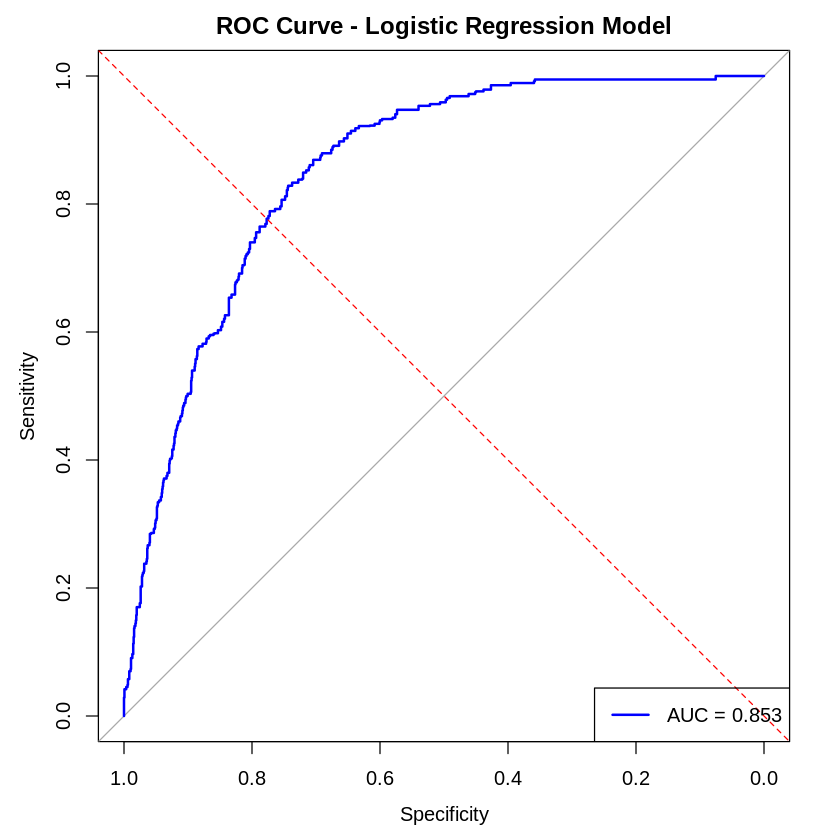

In [97]:
# Load necessary libraries
library(pROC)  # For ROC curve
log_roc <- roc(test_data$stroke, log_pred_prob)

# Plot the ROC curve
plot(log_roc, col = "blue", lwd = 2, main = "ROC Curve - Logistic Regression Model")
abline(a = 0, b = 1, lty = 2, col = "red")  # Reference line (random guess)

# Add AUC (Area Under the Curve)
auc_value <- auc(log_roc)
legend("bottomright", legend = paste("AUC =", round(auc_value, 3)), col = "blue", lwd = 2)


2. RANDOM FOREST

In [98]:

# Build the random forest model
rf_model <- randomForest(stroke ~ ., data = train_data, ntree = 100)

# Print the model summary
print(rf_model)



Call:
 randomForest(formula = stroke ~ ., data = train_data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.6%
Confusion matrix:
     0    1 class.error
0 3293  109  0.03203998
1    0 3402  0.00000000


In [102]:
# Make predictions on the test set
rf_predictions <- predict(rf_model, newdata = test_data)

# View predicted classes
#head(rf_predictions)
# Get predicted probabilities for Random Forest
rf_pred_prob <- predict(rf_model, newdata = test_data, type = "prob")[, 2]
# View predicted classes


In [103]:
# Evaluate Random Forest model
confusion_matrix_rf <- confusionMatrix(as.factor(rf_predictions), as.factor(test_data$stroke))
print(confusion_matrix_rf)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1414    0
         1   44 1458
                                         
               Accuracy : 0.9849         
                 95% CI : (0.9798, 0.989)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9698         
                                         
 Mcnemar's Test P-Value : 9.022e-11      
                                         
            Sensitivity : 0.9698         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9707         
             Prevalence : 0.5000         
         Detection Rate : 0.4849         
   Detection Prevalence : 0.4849         
      Balanced Accuracy : 0.9849         
                                         
       'Positive' Class : 0              
                                         


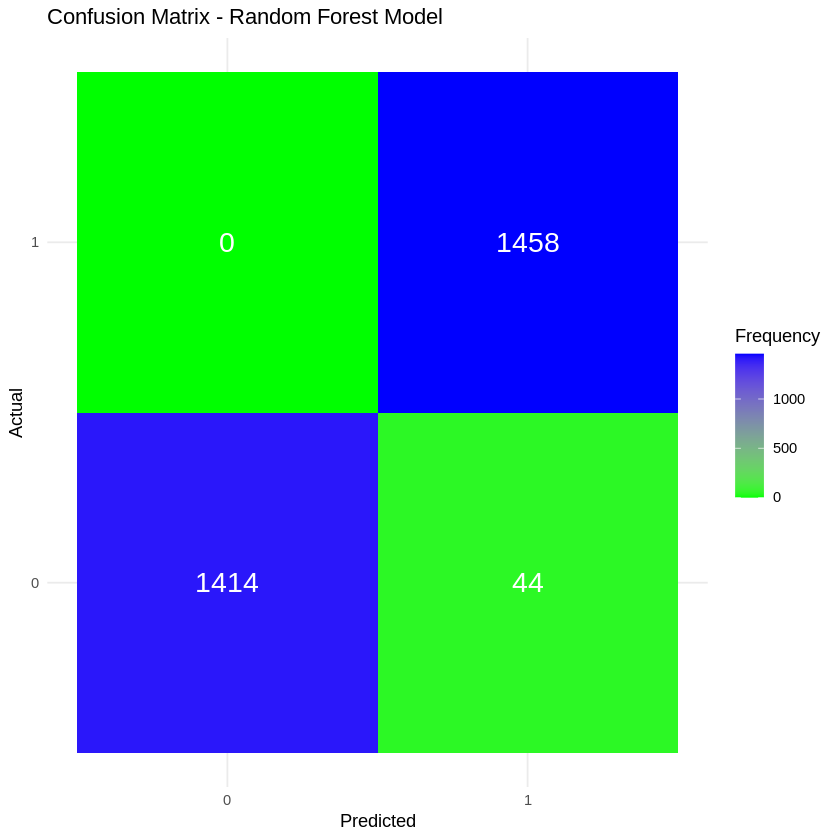

In [104]:
# Convert confusion matrix to a data frame
cm_rf_df <- as.data.frame(as.table(confusion_matrix_rf))

# Ensure proper column names
colnames(cm_rf_df) <- c("Predicted", "Actual", "Frequency")

# Plot confusion matrix for Random Forest model
ggplot(cm_rf_df, aes(Predicted, Actual, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "white", size = 6) +
  scale_fill_gradient(low = "green", high = "blue") +
  labs(title = "Confusion Matrix - Random Forest Model",
       x = "Predicted",
       y = "Actual") +
  theme_minimal()


Setting levels: control = 0, case = 1

Setting direction: controls < cases



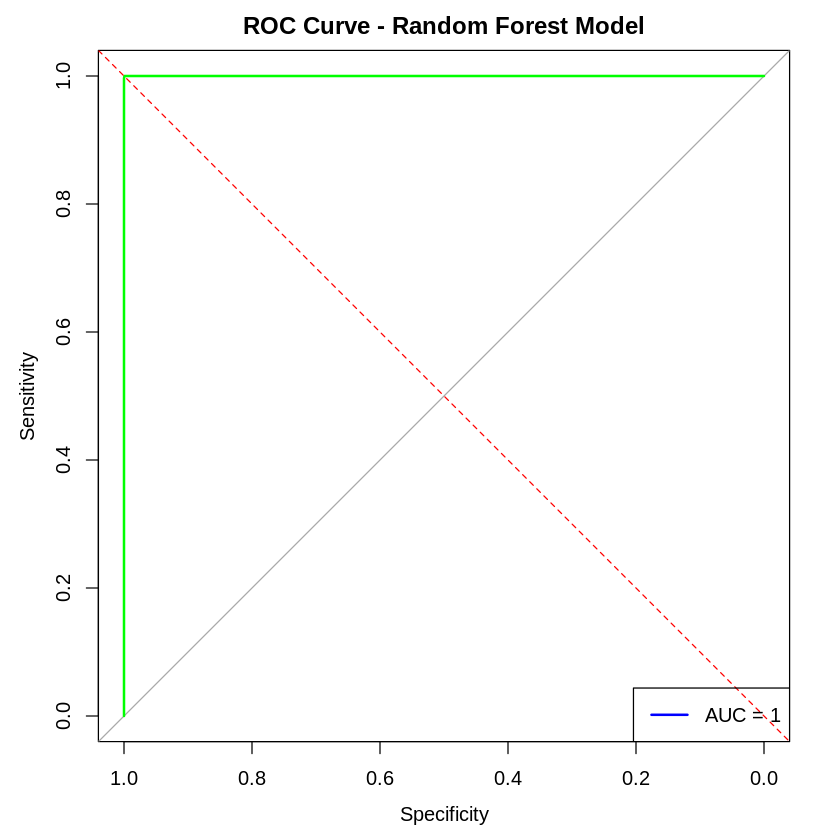

In [105]:


# Calculate the ROC curve
rf_roc <- roc(test_data$stroke, rf_pred_prob)

# Plot the ROC curve
plot(rf_roc, col = "green", lwd = 2, main = "ROC Curve - Random Forest Model")
abline(a = 0, b = 1, lty = 2, col = "red")  # Reference line
rf_auc <- auc(rf_roc)
# Add AUC (Area Under the Curve)
auc_value <- auc(rf_roc)
legend("bottomright", legend = paste("AUC =", round(auc_value, 3)), col = "blue", lwd = 2)

3. SVM

In [107]:


# Train an SVM model
svm_model <- svm(stroke ~ ., data = train_data, kernel = "linear")

# Predict using the trained SVM model
svm_predictions <- predict(svm_model, test_data)




In [108]:
# Evaluate the model with confusion matrix
confusion_matrix_svm <- confusionMatrix(as.factor(svm_predictions), as.factor(test_data$stroke))
print(confusion_matrix_svm)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1054  239
         1  404 1219
                                         
               Accuracy : 0.7795         
                 95% CI : (0.764, 0.7944)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.559          
                                         
 Mcnemar's Test P-Value : 9.962e-11      
                                         
            Sensitivity : 0.7229         
            Specificity : 0.8361         
         Pos Pred Value : 0.8152         
         Neg Pred Value : 0.7511         
             Prevalence : 0.5000         
         Detection Rate : 0.3615         
   Detection Prevalence : 0.4434         
      Balanced Accuracy : 0.7795         
                                         
       'Positive' Class : 0              
                                         


4. GRADIENT BOOSTING

In [109]:
# Load necessary library for GBM
install.packages("gbm")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [110]:
library(gbm)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [111]:
# Convert target variable (stroke) to numeric
stroke_data$stroke <- as.numeric(as.factor(stroke_data$stroke)) - 1  # This ensures that 0 and 1 are the values


In [112]:
# Train a GBM model
# Train the Gradient Boosting Model
model_gbm <- gbm(stroke ~ .,
                 data = stroke_data,
                 distribution = "bernoulli",
                 n.trees = 100,
                 interaction.depth = 3)

# Predict using the trained GBM model
gbm_predictions <- predict(model_gbm, test_data, type = "response")
gbm_predictions_class <- ifelse(gbm_predictions > 0.5, 1, 0)

# Evaluate the model with confusion matrix
confusion_matrix_gbm <- confusionMatrix(as.factor(gbm_predictions_class), as.factor(test_data$stroke))
print(confusion_matrix_gbm)

Using 100 trees...




Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1458 1383
         1    0   75
                                         
               Accuracy : 0.5257         
                 95% CI : (0.5074, 0.544)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : 0.002892       
                                         
                  Kappa : 0.0514         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 1.00000        
            Specificity : 0.05144        
         Pos Pred Value : 0.51320        
         Neg Pred Value : 1.00000        
             Prevalence : 0.50000        
         Detection Rate : 0.50000        
   Detection Prevalence : 0.97428        
      Balanced Accuracy : 0.52572        
                                         
       'Positive' Class : 0              
                                         


4. NAIVE BAYES

In [114]:
# Load necessary library for Naive Bayes
library(e1071)

# Train a Naive Bayes model
nb_model <- naiveBayes(stroke ~ ., data = train_data)

# Predict using the trained Naive Bayes model
nb_predictions <- predict(nb_model, test_data)

# Evaluate the model with confusion matrix
confusion_matrix_nb <- confusionMatrix(as.factor(nb_predictions), as.factor(test_data$stroke))
print(confusion_matrix_nb)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1091  360
         1  367 1098
                                          
               Accuracy : 0.7507          
                 95% CI : (0.7346, 0.7663)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5014          
                                          
 Mcnemar's Test P-Value : 0.8239          
                                          
            Sensitivity : 0.7483          
            Specificity : 0.7531          
         Pos Pred Value : 0.7519          
         Neg Pred Value : 0.7495          
             Prevalence : 0.5000          
         Detection Rate : 0.3741          
   Detection Prevalence : 0.4976          
      Balanced Accuracy : 0.7507          
                                          
       'Positive' Class : 0               
                        

In [115]:
library(rpart)
install.packages("rpart.plot")

library(rpart.plot)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [116]:
tree_model <- rpart(stroke ~ ., data = train_data, method = "class", control = rpart.control(cp = 0.01))


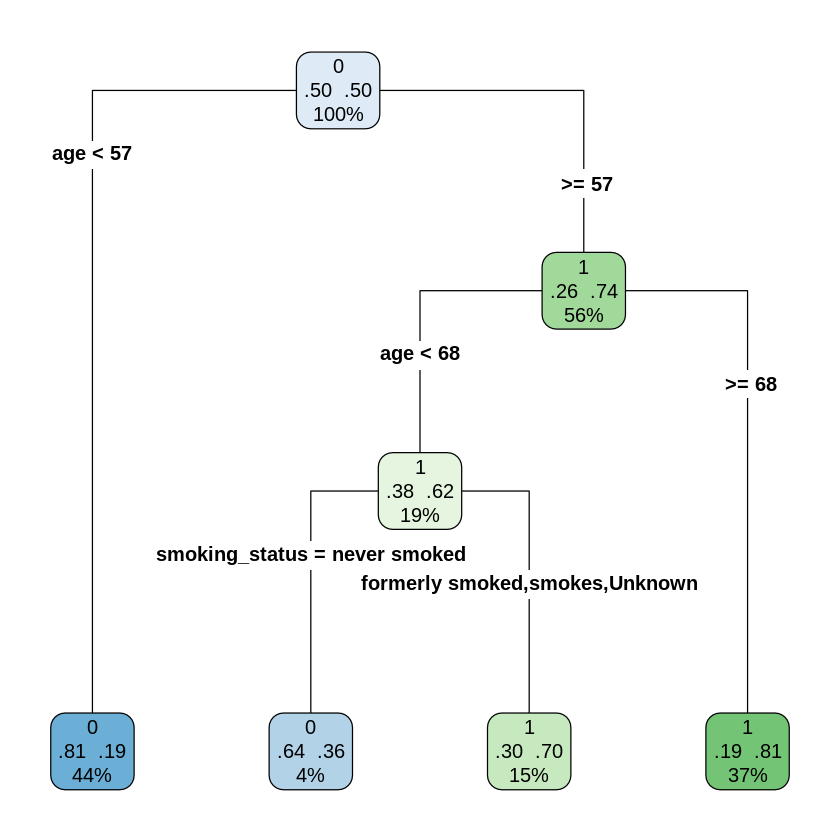

In [118]:
rpart.plot(tree_model, type = 4, extra = 104, fallen.leaves = TRUE)


In [119]:
predictions <- predict(tree_model, test_data, type = "prob")[, 2]  # Probabilities for the positive class


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8022

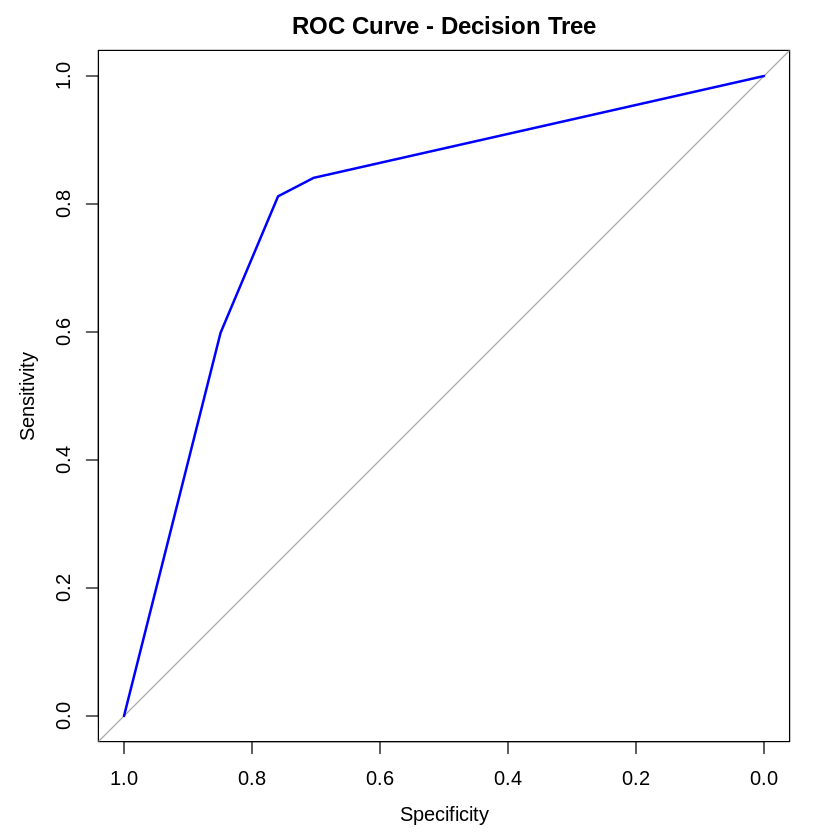

In [120]:
library(pROC)
tree_roc <- roc(test_data$stroke, predictions)
plot(tree_roc, col = "blue", lwd = 2, main = "ROC Curve - Decision Tree")
auc(tree_roc)


In [121]:
tree_model$variable.importance


age      ever_married         work_type               bmi 
       1098.04162         294.38719         187.05124         157.90266 
   smoking_status avg_glucose_level 
        129.83131          77.01218

In [122]:
library(ipred)


In [123]:
bagging_model <- bagging(stroke ~ ., data = train_data, nbagg = 50)


In [124]:
bagging_pred_prob <- predict(bagging_model, test_data, type = "prob")


In [125]:
print(dim(bagging_pred_prob))  # Check dimensions
print(head(bagging_pred_prob))  # Check contents


[1] 2916    2
        0    1
[1,] 0.88 0.12
[2,] 0.92 0.08
[3,] 0.90 0.10
[4,] 0.96 0.04
[5,] 1.00 0.00
[6,] 0.84 0.16


In [126]:
predictions <- predict(bagging_model, test_data, type = "prob")[, 2]


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 1

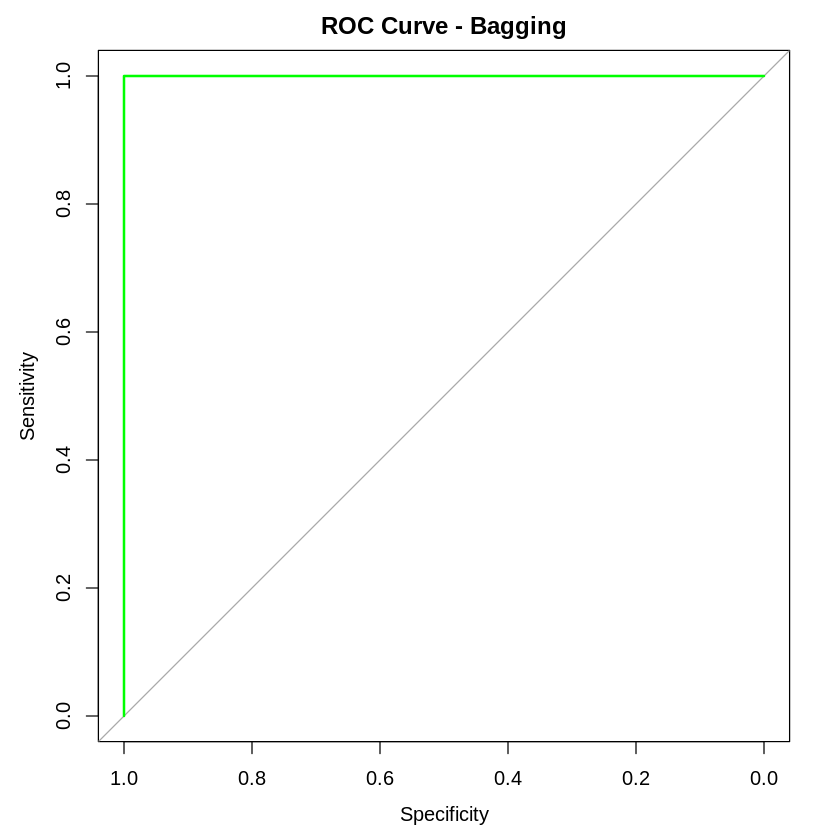

In [127]:
bagging_roc <- roc(test_data$stroke, predictions)
plot(bagging_roc, col = "green", lwd = 2, main = "ROC Curve - Bagging")
auc(bagging_roc)


In [128]:
install.packages("caretEnsemble")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’




6. XGBOOST

In [129]:
# Load necessary library for XGBoost
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [130]:
library(xgboost)

In [131]:
# Convert the data to matrix format
train_matrix <- as.matrix(train_data[, -which(names(train_data) == "stroke")])
test_matrix <- as.matrix(test_data[, -which(names(test_data) == "stroke")])

# Ensure the target variable is numeric (0 and 1)
train_labels <- as.numeric(train_data$stroke)
test_labels <- as.numeric(test_data$stroke)


In [132]:
# Convert factors to numeric
train_data[] <- lapply(train_data, function(x) {
  if (is.factor(x) || is.character(x)) as.numeric(as.factor(x)) else x
})
test_data[] <- lapply(test_data, function(x) {
  if (is.factor(x) || is.character(x)) as.numeric(as.factor(x)) else x
})

# Create numeric matrices
train_matrix <- as.matrix(train_data[, -which(names(train_data) == "stroke")])
test_matrix <- as.matrix(test_data[, -which(names(test_data) == "stroke")])


In [133]:
# Convert labels to numeric
train_labels <- as.numeric(as.factor(train_data$stroke)) - 1
test_labels <- as.numeric(as.factor(test_data$stroke)) - 1


In [134]:
# Create DMatrix objects
dtrain <- xgb.DMatrix(data = train_matrix, label = train_labels)
dtest <- xgb.DMatrix(data = test_matrix, label = test_labels)


In [135]:
# Define XGBoost parameters
params <- list(
  objective = "binary:logistic",  # Binary classification
  eval_metric = "logloss",       # Loss function
  max_depth = 6,                 # Depth of the trees
  eta = 0.3,                     # Learning rate
  gamma = 0,                     # Minimum loss reduction
  subsample = 0.8,               # Fraction of data to use for training
  colsample_bytree = 0.8         # Fraction of features to use per tree
)


In [136]:
# Train the XGBoost model
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100,                  # Number of boosting rounds
  watchlist = list(train = dtrain, test = dtest),  # Monitor training and test data
  verbose = 1                     # Print progress
)


[1]	train-logloss:0.552286	test-logloss:0.559418 
[2]	train-logloss:0.474612	test-logloss:0.483045 
[3]	train-logloss:0.424756	test-logloss:0.435785 
[4]	train-logloss:0.386560	test-logloss:0.398741 
[5]	train-logloss:0.359618	test-logloss:0.374571 
[6]	train-logloss:0.343691	test-logloss:0.360110 
[7]	train-logloss:0.326368	test-logloss:0.343688 
[8]	train-logloss:0.305303	test-logloss:0.324615 
[9]	train-logloss:0.291242	test-logloss:0.312474 
[10]	train-logloss:0.280265	test-logloss:0.301987 
[11]	train-logloss:0.266856	test-logloss:0.290118 
[12]	train-logloss:0.250959	test-logloss:0.277161 
[13]	train-logloss:0.241775	test-logloss:0.269855 
[14]	train-logloss:0.237362	test-logloss:0.267007 
[15]	train-logloss:0.230053	test-logloss:0.261662 
[16]	train-logloss:0.226789	test-logloss:0.259219 
[17]	train-logloss:0.220137	test-logloss:0.253020 
[18]	train-logloss:0.215167	test-logloss:0.248522 
[19]	train-logloss:0.213954	test-logloss:0.247590 
[20]	train-logloss:0.208338	test-logloss

In [137]:
# Make predictions on the test dataset
xgb_predictions <- predict(xgb_model, dtest)

# Convert probabilities to binary predictions (threshold = 0.5)
xgb_pred_class <- ifelse(xgb_predictions > 0.5, 1, 0)


In [138]:
# Confusion Matrix
confusion_matrix_xgb <- confusionMatrix(as.factor(xgb_pred_class), as.factor(test_labels))
print(confusion_matrix_xgb)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1378    0
         1   80 1458
                                         
               Accuracy : 0.9726         
                 95% CI : (0.966, 0.9782)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9451         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9451         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9480         
             Prevalence : 0.5000         
         Detection Rate : 0.4726         
   Detection Prevalence : 0.4726         
      Balanced Accuracy : 0.9726         
                                         
       'Positive' Class : 0              
                                         


Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC for XGBoost: 0.998155016267093"


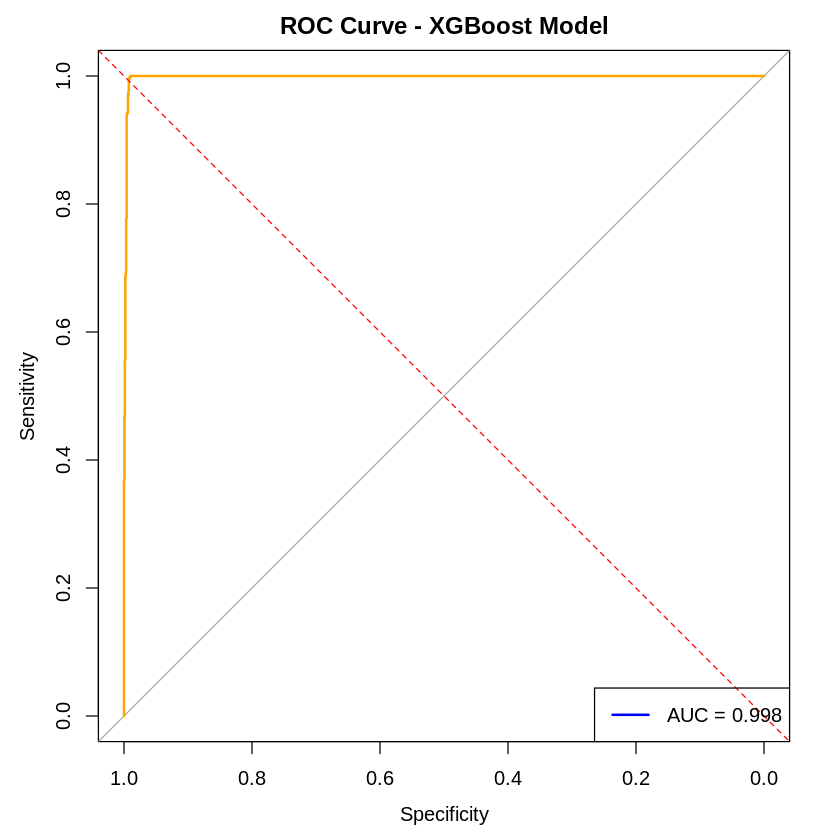

In [139]:

# Compute the ROC curve
xgb_roc <- roc(test_data$stroke, xgb_predictions)

# Print the AUC (Area Under the Curve)
xgb_auc <- auc(xgb_roc)
print(paste("AUC for XGBoost:", xgb_auc))

# Plot the ROC curve
plot(xgb_roc, col = "orange", lwd = 2, main = "ROC Curve - XGBoost Model")
abline(a = 0, b = 1, lty = 2, col = "red")  # Add a diagonal reference line
#Add AUC (Area Under the Curve)
auc_value <- auc(xgb_roc)
legend("bottomright", legend = paste("AUC =", round(auc_value, 3)), col = "blue", lwd = 2)

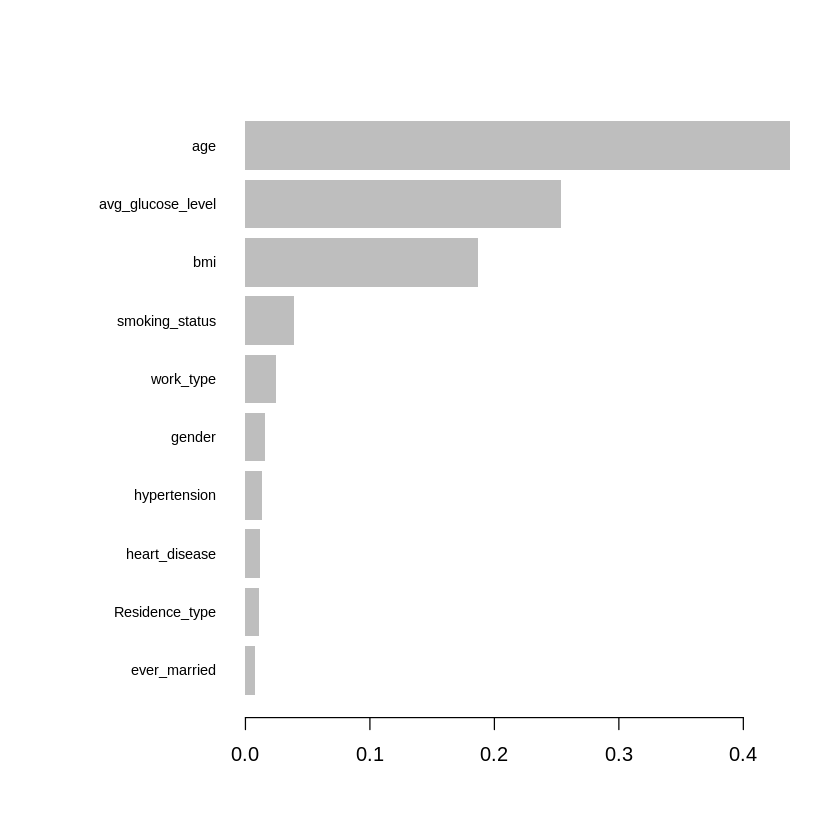

In [140]:
# Get feature importance
importance <- xgb.importance(model = xgb_model)

# Plot feature importance
xgb.plot.importance(importance)

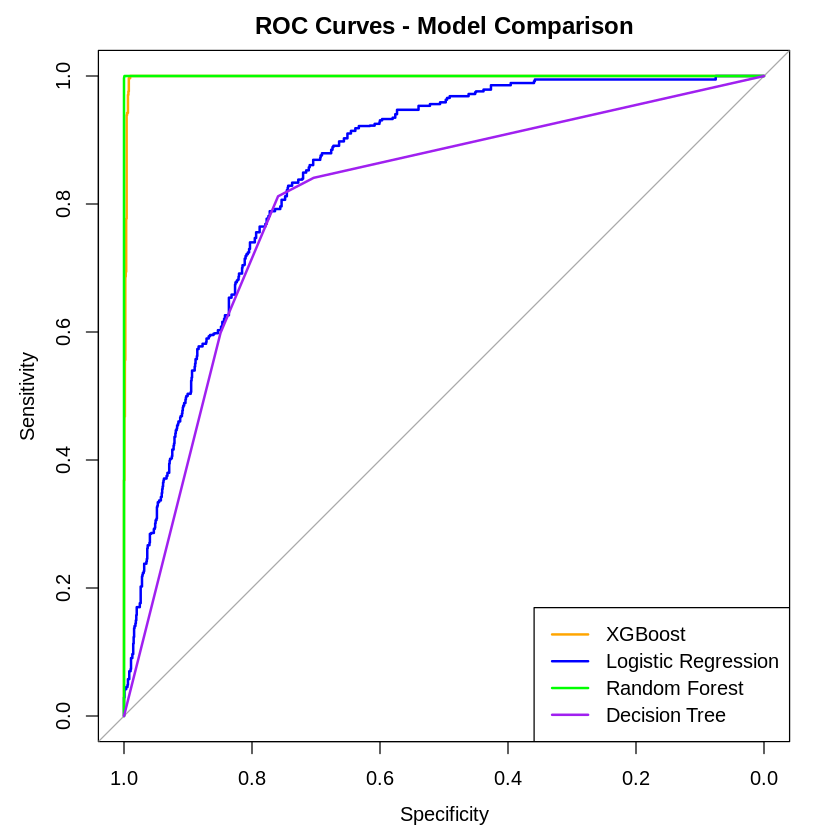

In [158]:
# Plot XGBoost ROC curve
plot(xgb_roc, col = "orange", lwd = 2, main = "ROC Curves - Model Comparison")

# Add ROC curves for other models
lines(log_roc, col = "blue", lwd = 2)       # Logistic Regression
lines(rf_roc, col = "green", lwd = 2)       # Random Forest
lines(tree_roc , col = "purple", lwd = 2)
# Add a legend
legend("bottomright", legend = c("XGBoost", "Logistic Regression", "Random Forest", "Decision Tree"),
       col = c("orange", "blue", "green", "purple"), lwd = 2)


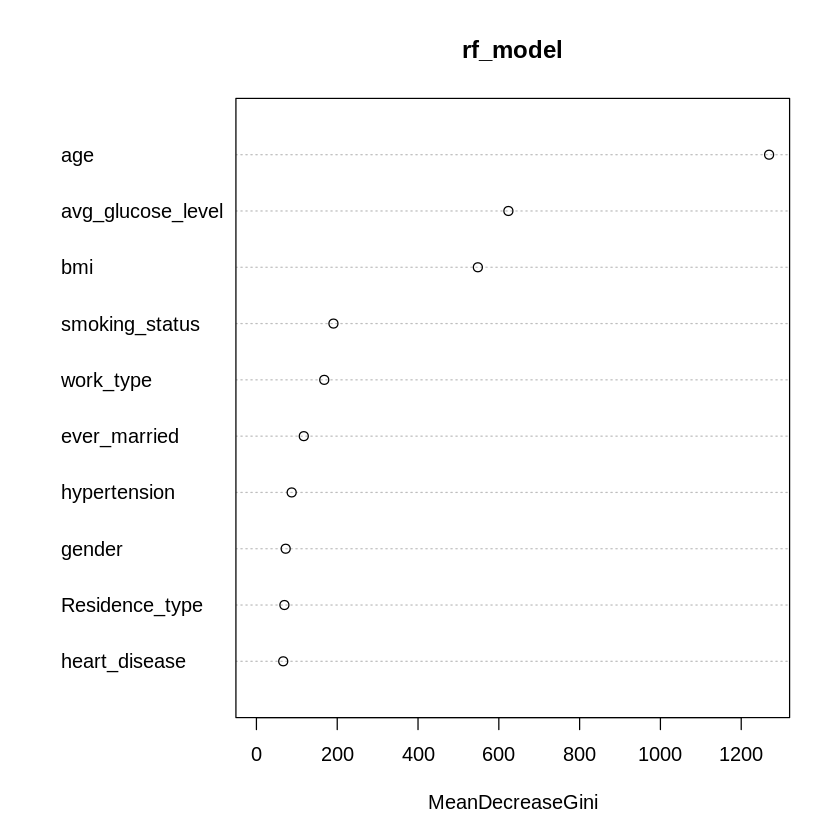

In [142]:
varImpPlot(rf_model)


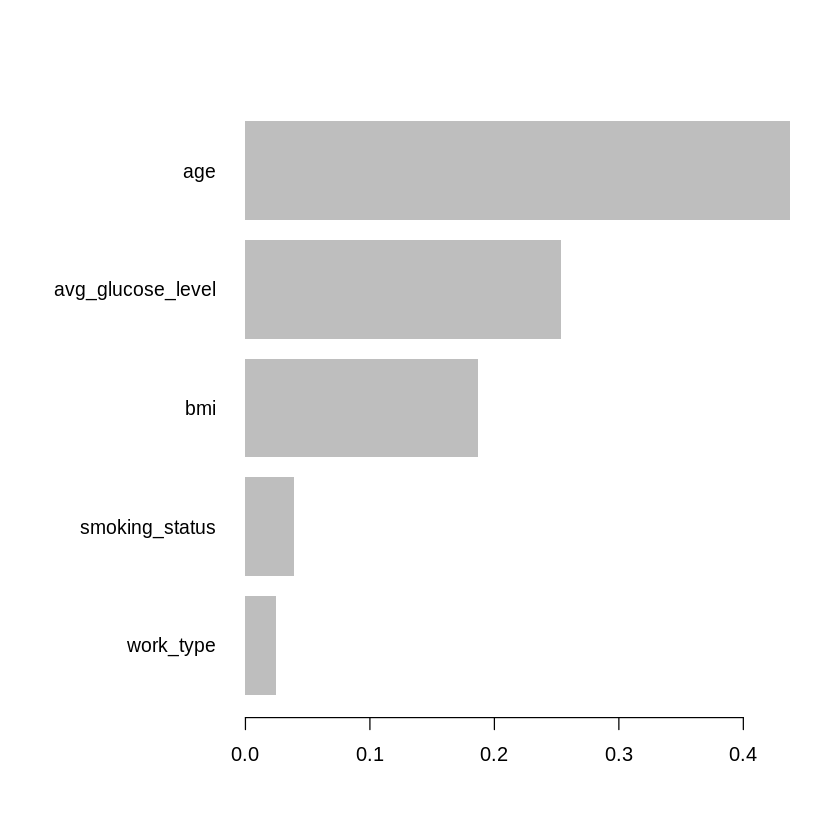

In [143]:
xgb.importance(model = xgb_model) %>% xgb.plot.importance(top_n = 5)


In [144]:

# Install necessary packages (if not already installed)
install.packages("iml")       # For SHAP explainability
install.packages("DALEX")     # Required by shapper
install.packages("shapper")   # For SHAP visualizations

# Load the packages
library(iml)
library(DALEX)
library(shapper)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘Metrics’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iBreakDown’, ‘ingredients’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘reticulate’


Welcome to DALEX (version: 2.4.3).
Find examples and detailed introduction at: http://ema.drwhy.ai/
Additional features will be available after installation of: ggpubr.
Use 'install_dependencies()' to get all suggested dependencies


Attaching package: ‘DALEX’


The following object is masked from ‘package:dplyr’:

    explain




In [145]:
# Wrap your XGBoost model in a Predictor object
predictor <- Predictor$new(
  model = xgb_model,
  data = train_data[, -which(names(train_data) == "stroke")], # Features only
  y = train_labels,
  predict.function = function(model, newdata) {
    predict(model, newdata = as.matrix(newdata)) # XGBoost requires a matrix
  }
)


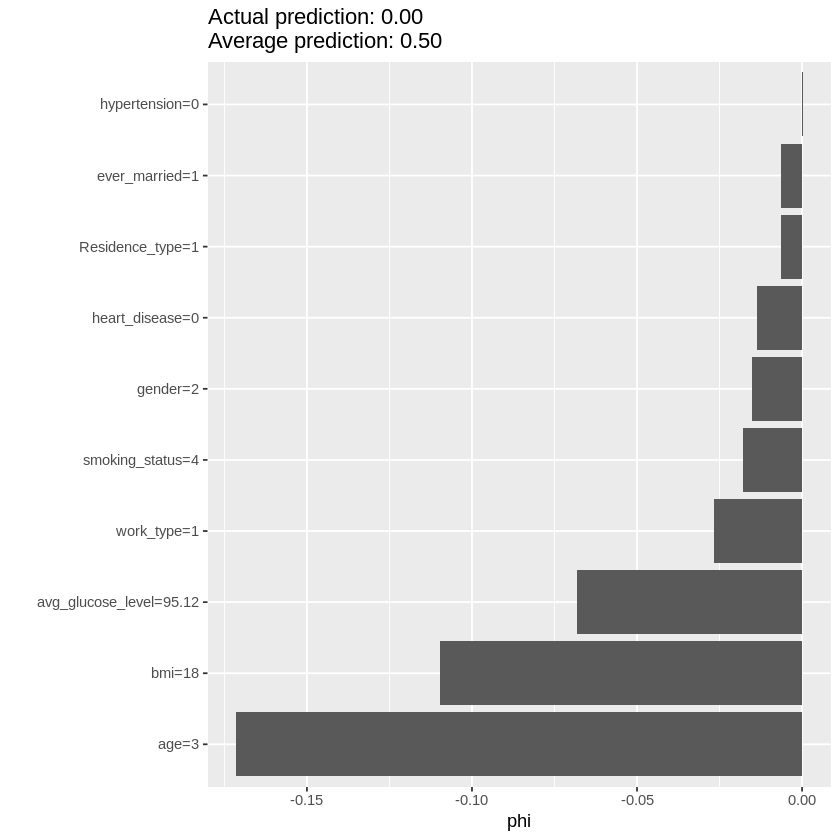

In [146]:
# Select a single observation from your dataset
observation <- train_data[1, -which(names(train_data) == "stroke")]

# Compute SHAP values for this observation
shapley <- Shapley$new(predictor, x.interest = observation)

# Plot SHAP values for the observation
plot(shapley)


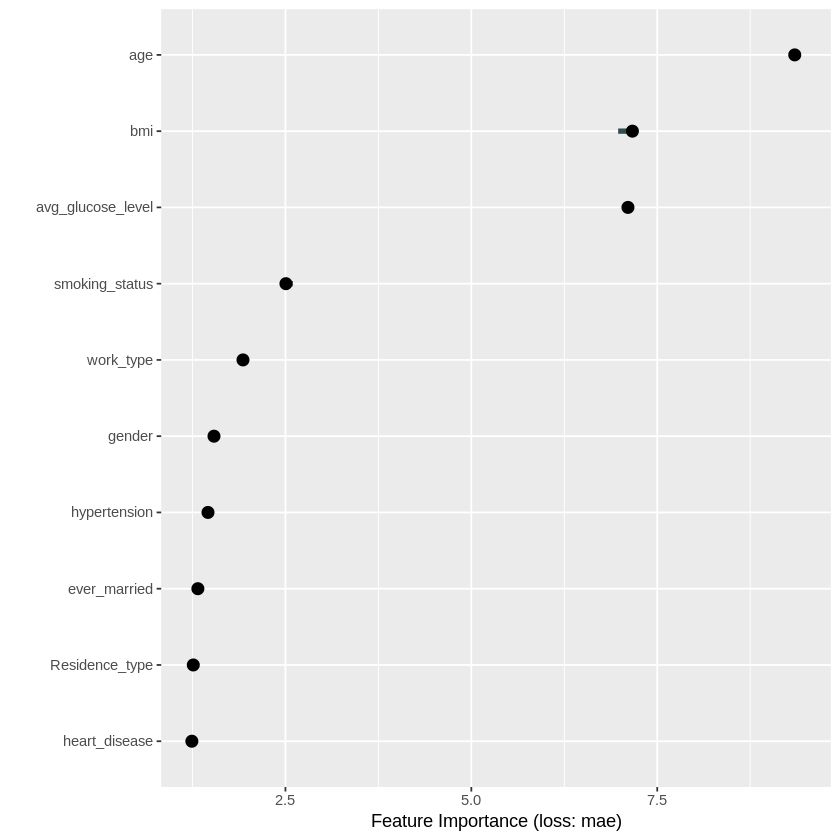

In [147]:
# Compute SHAP values for multiple observations
global_shap <- FeatureImp$new(predictor, loss = "mae") # Use Mean Absolute Error for feature importance

# Plot global feature importance
plot(global_shap)


In [149]:
# Save the Random Forest model
saveRDS(rf_model, "random_forest_model.rds")


In [150]:
# Save the XGBoost model
saveRDS(xgb_model, "xgboost_model.rds")
